In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from pathlib import Path, PureWindowsPath
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', None) #afficher texte entier dans dataframe

In [2]:
current_folder = PureWindowsPath(globals()['_dh'][0]).as_posix()
path_root = "/".join(current_folder.split("/")[:-2]) #remonter au dossier root du projet
os.chdir(path_root)
path = PureWindowsPath(os.getcwd() + "/data/input/data.parquet")
path = path.as_posix() #convertir en path linux (convertir les \\ en /)
corpus = pd.read_parquet(path) #engine="fastparquet"

zeros_subset = corpus.loc[corpus["category_bin"] == 0, :]
ones_subset = corpus.loc[corpus["category_bin"] == 1, :]
number_of_minority_class = len(zeros_subset)
sampled_ones = ones_subset.sample(number_of_minority_class, random_state=42)
print(sampled_ones.shape)
corpus = pd.concat([sampled_ones, zeros_subset], ignore_index=True)
corpus = corpus.sample(frac=1).reset_index(drop=True)
corpus.index = list(range(len(corpus)))
corpus["id"] = corpus.index	#creation de l'id seulement apres equilibrage des classes et melange aleatoire
print(corpus["category_bin"].value_counts())
print(corpus.id.duplicated().any())
print(corpus.index.duplicated().any())
corpus

(1825, 6)
1    1825
0    1825
Name: category_bin, dtype: int64
False
False


,id,message,message_preprocessed,category,length,category_bin
0,0,"> On lit (Rm 6, 23) : “ Le don de Dieu, c’est la vie éternelle. ” Or la vie > éternelle consiste dans la vision de l’essence divine, selon ces mots (Jn > 17, 3) : “ La vie éternelle, c’est qu’ils te connaissent, toi, le seul vrai > Dieu. ” Donc **voir l’essence de Dieu convient à l’intellect créé par grâce, > et non par nature.** –Ia, Q12, a4",lit rm “ don dieu vie éternelle ” or vie éternelle consiste vision essence divine selon mot jn “ vie éternelle connaissent seul vrai dieu ” donc voir essence dieu convient intellect créé grâce non nature –ia q a,philosophy,348,1
1,1,"Nous avons, la semaine passé, clôt le sujet de comment nous connaissons/connaîtrons Dieu. Mais Thomas bute alors sur un problème [récemment caractérisé sur notre blog Par la Foi](https://parlafoiblog.wordpress.com/2018/03/14/quelle-place-pour-les- paradoxes-en-theologie-chretienne/). Dieu ne parle ni latin ni français, ni anglais, ni grec ni hébreu. Selon les paroles très justes de Laurent:",semaine passé clôt sujet comment connaissonsconnaîtrons dieu thomas bute alors problème récemment caractérisé blog foihttpsparlafoiblogwordpresscomquelle-place-pour-les- paradoxes-en-theologie-chretienne dieu parle ni latin ni français ni anglais ni grec ni hébreu selon parole très juste laurent,philosophy,398,1
2,2,"## Article 5: Il n’y a qu’un seul Dieu possible, notre Dieu",article a seul dieu possible dieu,philosophy,59,1
3,3,Cela suffira à comprendre ce qu’est le point le plus important de la théologie réformée.,cela suffira comprendre point plus important théologie réformée,baptism,89,0
4,4,"Les mauvais comme les bons ont accès à ces biens (richesses, honneurs, gloire, puissance). Or la béatitude n’est que pour les bons. Donc la béatitude ne consiste pas dans des biens extérieurs.",mauvais comme bon accès bien richesse honneur gloire puissance or béatitude bon donc béatitude consiste bien extérieur,philosophy,194,1
...,...,...,...,...,...,...
3645,3645,"Je ne vais pas rentrer dans un débat sur ce sujet —je n’en ai pas l’énergie— mais la lecture des Pères par les théologiens que cites est clairement une forme de « présentisme » basée : (1) Sur une compréhension très étroite de la notion de régénération qui exclut du champ de la régénération baptismale des notions comme la purification baptismale et le « prêt de la foi » par un tiers, etc. C’est un peu maladroit de commencer par ma définition de la régénération baptismale, alors que j’explique dans mon ouvrage que ce terme générique comprend toutes les positions qui font du baptême une cause instrumentale du salut et du pardon des péchés, pas simplement un changement d’habitus au sens où nous comprenons la régénération aujourd’hui. (2) Sur une vision très étroite qu’impliquerait la transformation opérée dans le cadre d’une régénération baptismale, de sorte que la plupart des textes patristiques en sont exclus! J’ai l’impression de retrouver les mêmes arguments que ceux des baptistes qui comparent leur position à celle de Tertullien sous prétexte qu’il mentionne l’engagement de foi des catéchumènes… Présentisme, quand tu nous tiens (3) Sur une analogie peu convaincante entre baptême et Cène : nous ne trouvons aucun langage pleinement réaliste impliquant une transformation, quelle qu’elle soit, sur la Cène avant le 9ème siècle, tandis qu’il est très bien établit pour le baptême des le troisième siècle. Bref, je n’insiste pas, mais je ne suis pas convaincu du tout que … les Pères étaient presbytériens.",vais rentrer débat sujet —je énergie— lecture père théologien cites clairement forme « présentisme » basée compréhension très étroite notion régénération exclut champ régénération baptismale notion comme purification baptismale « prêt foi » tiers etc peu maladroit commencer définition régénération baptismale alors explique ouvrage terme générique comprend toutes position font baptême cause instrumentale salut pardon péché simplement changement habitus sen

In [3]:
X = corpus["message_preprocessed"]
y = corpus["category"]
# y = corpus["category_bin"]
indices = corpus["id"]
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.33, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# indices_test

In [4]:
#Dimensions de la matrice
print("corpus.shape =", corpus.shape)
print("X_tfidf.shape =", X_train_tfidf.shape) # = (nb_documents, nb_mots)
print("X_tfidf.type =", type(X_train_tfidf)) # = (nb_documents, nb_mots)
print("X_tfidf :")
print(type(X_train_tfidf))
print(X_train_tfidf)

corpus.shape = (3650, 6)
X_tfidf.shape = (2445, 9492)
X_tfidf.type = <class 'scipy.sparse.csr.csr_matrix'>
X_tfidf :
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 3928)	0.11315116129708337
  (0, 1549)	0.08595355979840409
  (0, 7906)	0.2089908670410233
  (0, 5452)	0.18363857255330712
  (0, 5563)	0.12278449655008225
  (0, 9066)	0.1417284424814517
  (0, 1786)	0.1613509101783029
  (0, 3342)	0.12044883444891669
  (0, 4422)	0.26074121647890963
  (0, 78)	0.19009099829267856
  (0, 9079)	0.42475732133536565
  (0, 2239)	0.1851343910911721
  (0, 1292)	0.09297135043222776
  (0, 6721)	0.24770376976079836
  (0, 6942)	0.11331479676465292
  (0, 5950)	0.12065429393380532
  (0, 7503)	0.20055472777692937
  (0, 2237)	0.2254161073857941
  (0, 4721)	0.15923007789576019
  (0, 7034)	0.1795281799781412
  (0, 6053)	0.21616589172890116
  (0, 5428)	0.15724051760313698
  (0, 2038)	0.20055472777692937
  (0, 1037)	0.2254161073857941
  (0, 2245)	0.23845355410390542
  :	:
  (2443, 3176)	0.24121021267389825
  (2443, 8135

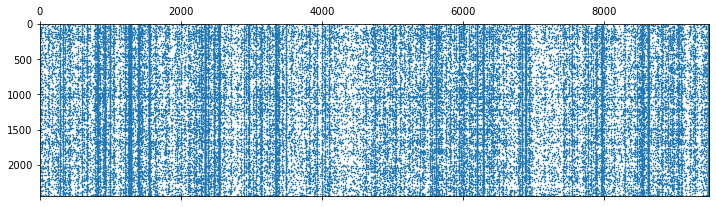

In [9]:
#Plot 0 de la matrice (avec un spy de matplotlib)
plt.spy(X_train_tfidf, markersize=0.5)

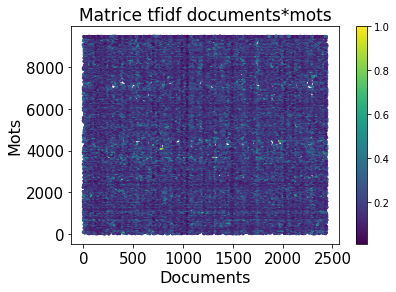

In [5]:
#Plot 1 de la matrice (avec un scatterplot de matplotlib)
path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_matrix_matplotlib.png")
path = path.as_posix()

X_tfidf_dict = X_train_tfidf.todok()
X_tfidf_xy = np.array(list(X_tfidf_dict.keys()))
X_tfidf_val = np.array(list(X_tfidf_dict.values()))
plt.scatter(X_tfidf_xy[:,0], X_tfidf_xy[:,1], s=5, c=X_tfidf_val)
plt.xlabel("Documents", size=16)
plt.ylabel("Mots", size=16)
plt.title("Matrice tfidf documents*mots", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar()
plt.rcParams["figure.figsize"] = (12, 8)
plt.savefig(path)
plt.show()

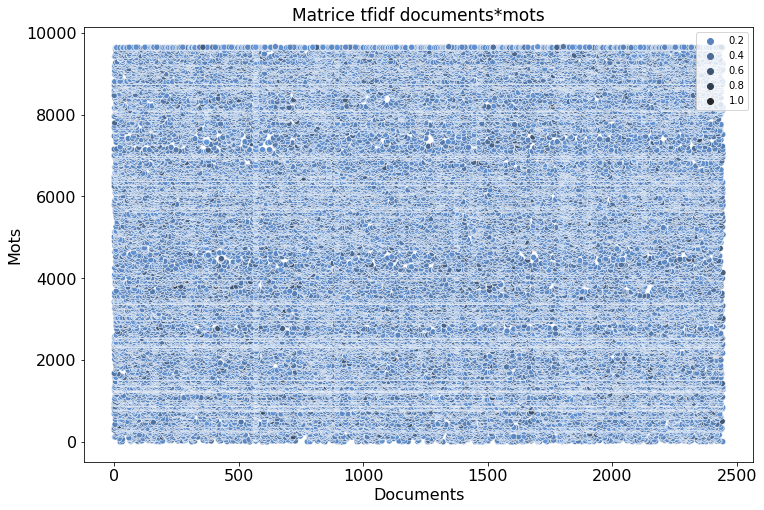

In [6]:
#Plot 2 de la matrice (avec scatterplot de seaborn)
X_tfidf_dict = X_train_tfidf.todok()
# X_tfidf_dict = X_tfidf[:10000,:].todok()
X_tfidf_xy = np.array(list(X_tfidf_dict.keys()))
X_tfidf_val = np.array(list(X_tfidf_dict.values()))

path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_matrix_seaborn.png")
path = path.as_posix()

sb.scatterplot(x=X_tfidf_xy[:,0], y=X_tfidf_xy[:,1], hue=X_tfidf_val, palette=sb.dark_palette("#69d", reverse=True, as_cmap=True))
plt.xlabel("Documents", size=16)
plt.ylabel("Mots", size=16)
plt.title("Matrice tfidf documents*mots", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (12, 8)
plt.savefig(path)
plt.show()

In [7]:
# Informations sur la matrice #
# Nombre de valeurs non nulles
print("nombre de valeurs non nulles (taille de la matrice csr) =", X_train_tfidf.count_nonzero())

# Intervalle des valeurs 
print("intervalle des valeurs [{} ; {}]".format(X_train_tfidf.min(), X_train_tfidf.max()))

# Valeurs uniques avec unique()
X_tfidf_unique = np.unique(X_train_tfidf.data)
print("valeurs uniques =", X_tfidf_unique)

# Nombre de valeurs uniques (auquel on additionne 1 pour les 0 qui ne sont pas stockees par definition)
print("nombre de valeurs uniques =", X_tfidf_unique.shape[0] + 1)

nombre de valeurs non nulles (taille de la matrice csr) = 61680
intervalle des valeurs [0.0 ; 1.0]
valeurs uniques = [0.01158802 0.01334289 0.01403852 ... 0.81086582 0.83438999 1.        ]
nombre de valeurs uniques = 50459


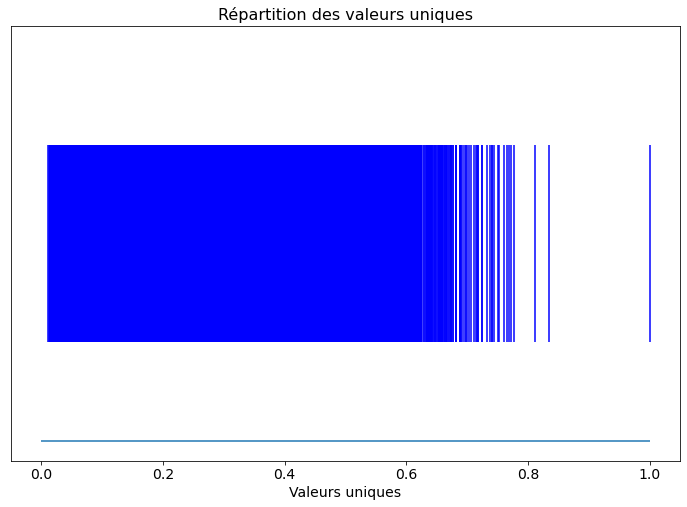

In [8]:
# Graphique avec barres en 1D des valeurs uniques (pour voir comment elles sont reparties, que a droite ?, que a gauche ?, etc.)
# sb.scatterplot(x=X_tfidf_unique, y=np.zeros_like(X_tfidf_unique), sizes=(10000,10000))
path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_unique_distribution.png")
path = path.as_posix()

plt.figure()
plt.hlines(0,0,1)  # Draw a horizontal line
plt.eventplot(X_tfidf_unique, orientation='horizontal', colors='b')
plt.xlabel("Valeurs uniques", size=14)
plt.title("Répartition des valeurs uniques", size=16)
plt.xticks(fontsize=14)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.rcParams["figure.figsize"] = (9, 4)
plt.savefig(path)
plt.show()

In [11]:
np.ravel(X_train_tfidf)

array([<2445x9492 sparse matrix of type '<class 'numpy.float64'>'
       	with 60897 stored elements in Compressed Sparse Row format>],
      dtype=object)

In [10]:
# Distribution des valeurs de la matrice tfidf
# values, counts = np.unique(X_tfidf.data, return_counts=True)
# value_counts = np.asarray((values, counts)).T

path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_distribution.png")
path = path.as_posix()

sb.histplot(X_train_tfidf.toarray(), edgecolor="black", linewidth=1)
plt.xlabel("Valeurs de la matrice tfidf", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la matrice tfidf", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(0, 0.6)
plt.savefig(path)
plt.show()

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

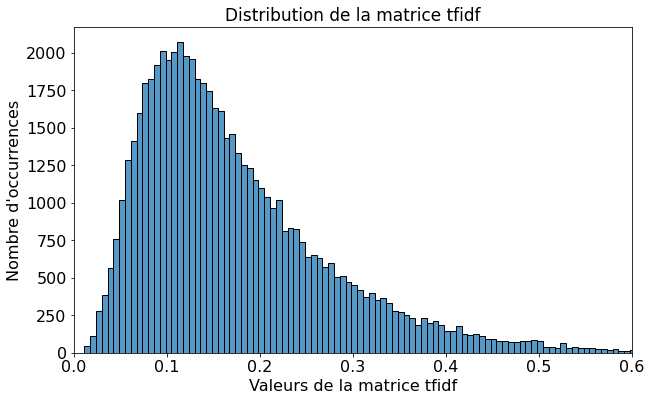

In [6]:
# Distribution des valeurs de la matrice tfidf
# values, counts = np.unique(X_tfidf.data, return_counts=True)
# value_counts = np.asarray((values, counts)).T

path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_distribution.png")
path = path.as_posix()

sb.histplot(X_train_tfidf.data, edgecolor="black", linewidth=1)
plt.xlabel("Valeurs de la matrice tfidf", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la matrice tfidf", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(0, 0.6)
plt.savefig(path)
plt.show()


In [10]:
# Poids globaux (dans le corpus) des mots tfidf
print("X_train_tfidf.shape =", X_train_tfidf.shape)
n_words = X_train_tfidf.shape[1]
scores_tfidf = pd.DataFrame({"id":range(n_words), "words":tfidf_vectorizer.get_feature_names(), "idf":tfidf_vectorizer.idf_})
scores_tfidf = scores_tfidf.sort_values("idf", ascending=False)
print("moyenne des poids idf =", np.mean(scores_tfidf["idf"]))
print("ecart-type des poids idf =", np.std(scores_tfidf["idf"]))
with pd.option_context("display.max_rows", 100):
    display(scores_tfidf)
# scores_tfidf.to_csv("./data/output/scores_tfidf_train.csv")

X_train_tfidf.shape = (2445, 9661)
moyenne des poids idf = 7.52393743742137
ecart-type des poids idf = 0.8787079892692071


c:\Users\eupho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,id,words,idf
0,0,aaaayaajpgpadqthechildofthecovenantorhowchristianparentsshouldtrainuptheirhouseholds,8.109062
5259,5259,maltraite,8.109062
5281,5281,manifesté,8.109062
5280,5280,manifesteront,8.109062
5279,5279,manifesterai,8.109062
...,...,...,...
1320,1320,cette,2.800794
6433,6433,plus,2.776343
1576,1576,comme,2.686317
9635,9635,être,2.675340


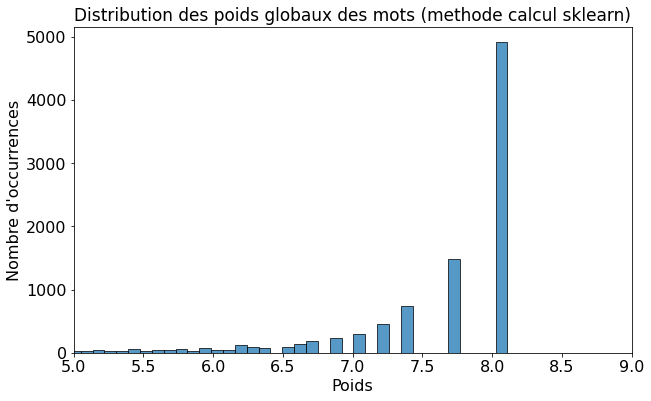

In [11]:
# Distribution des poids globaux des mots (calcules avec sklearn)
path = PureWindowsPath(os.getcwd() + "\\data\\output\\words_weights_distribution.png")
path = path.as_posix()

sb.histplot(data=scores_tfidf, x="idf")
# plt.yscale('log')
plt.xlabel("Poids", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution des poids globaux des mots (methode calcul sklearn)", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(5, 9)
plt.savefig(path)
plt.show()

In [12]:
# Calcul manuel des poids
print("X_train_tfidf.shape =", X_train_tfidf.shape)
words_weights = X_train_tfidf.sum(axis=0)
print("words_weights.shape =", words_weights.shape)
print(words_weights)
print(words_weights.shape)
words_weights = np.ravel(words_weights)
print(words_weights)
print(words_weights.shape)
# words_weights[:10]
np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.unique(words_weights).shape
np.max(words_weights)
np.min(words_weights)
print("words_weights.shape =", words_weights.shape)
words_weights

X_train_tfidf.shape = (2445, 9661)
words_weights.shape = (1, 9661)
[[0.28682476 0.84919908 0.32640663 ... 0.33386304 0.29974463 0.13890636]]
(1, 9661)
[0.28682476 0.84919908 0.32640663 ... 0.33386304 0.29974463 0.13890636]
(9661,)
words_weights.shape = (9661,)


array([0.287, 0.849, 0.326, ..., 0.334, 0.300, 0.139])

In [13]:
# scores_tfidf["manuel_weights"] = words_weights
print("corpus.shape =", corpus.shape)
print("scores_tfidf.shape =", scores_tfidf.shape)
scores_tfidf

corpus.shape = (3650, 6)
scores_tfidf.shape = (9661, 3)


,id,words,idf
0,0,aaaayaajpgpadqthechildofthecovenantorhowchristianparentsshouldtrainuptheirhouseholds,8.109062
5259,5259,maltraite,8.109062
5281,5281,manifesté,8.109062
5280,5280,manifesteront,8.109062
5279,5279,manifesterai,8.109062
...,...,...,...
1320,1320,cette,2.800794
6433,6433,plus,2.776343
1576,1576,comme,2.686317
9635,9635,être,2.675340


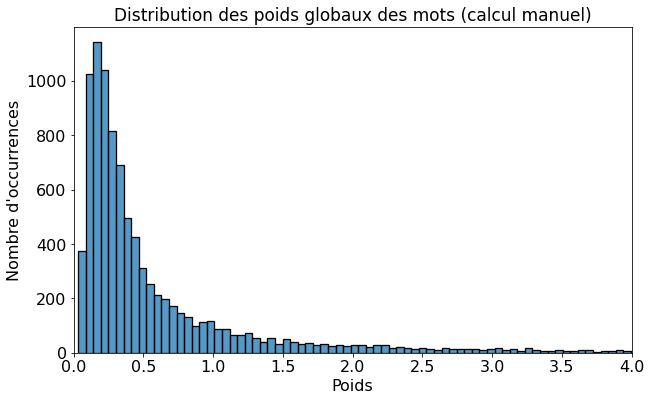

In [14]:
# Distribution des poids globaux des mots (calcules avec a la main)
# Pour chaque phrase, y a-t-il beaucoup de mots qui ont ete trouves et qui ont influences positivement la prediction ?
path = PureWindowsPath(os.getcwd() + "\\data\\output\\words_weights_distribution_manuel.png")
path = path.as_posix()

# sb.histplot(words_weights[:100000])
sb.histplot(words_weights, edgecolor="black", linewidth=1.3)
# plt.yscale('log')
plt.xlabel("Poids", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution des poids globaux des mots (calcul manuel)", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(0, 4)
plt.savefig(path)
plt.show()

In [16]:
# Calcul des poids locaux des mots (poids des mots pour chaque document)
# Technique : ne plus travailler sur la matrice creuse mais la convertir en numpy array X_train_tfidf.toarray()
# pour travailler dessus
threshold_score = 4.5
col_top_words = [] #liste des top words pour chaque exemple du corpus (partie train)

feature_names = tfidf_vectorizer.get_feature_names_out()
X_train_tfidf_arr = X_train_tfidf.toarray()
idx_vocab = np.argsort(X_train_tfidf_arr, axis=1)
vocab = tfidf_vectorizer.vocabulary_
vocab_inv = {v: k for k, v in vocab.items()}
idx_top_words = idx_vocab[:,-10:]
idx_top_words = np.flip(idx_top_words, axis=1)

col_top_words = []
for idx_row in range(len(idx_top_words)):
    row_matrix_top_words_idx = idx_top_words[idx_row]
    doc_top_words = []
    for idx_word in row_matrix_top_words_idx:
        word = vocab_inv[idx_word]
        score = str(round(X_train_tfidf_arr[idx_row, idx_word], 3))
        doc_top_words.append(word + " (" + score + ")")
    col_top_words.append(doc_top_words)

df_train = pd.DataFrame(X_train_tfidf_arr, columns = feature_names)
df_train["id"] = list(indices_train)
df_train["top_words"] = col_top_words
df_train.sort_values("id", inplace=True)
df_train["message"] = corpus.iloc[indices_train].sort_values("id")["message"].values

display(df_train[["message", "top_words"]])

,message,top_words
2197,"5. [Acte et Puissance en philosophie : une définition - Par la foi](https://parlafoi.fr/2019/08/28/acte-et-puissance-en-philosophie-une-definition/) \- […] Avec les distinctions Forme/Matière et Substance/Accident, cette distinction est comme le B A BA de toute réflexion. Elles sont…","[philosophie (0.398), distinction (0.341), puissance (0.311), foihttpsparlafoifracte (0.271), definition (0.257), formematière (0.257), substanceaccident (0.247), ba (0.247), réflexion (0.217), sont (0.214)]"
931,"Souviens-toi que je ne fais que vulgariser, j’invente pas grand chose.","[souviens (0.445), vulgariser (0.445), invente (0.445), toi (0.445), fais (0.351), grand (0.228), chose (0.182), essayent (0.0), essayer (0.0), essayez (0.0)]"
1425,"Notre infidélité n’annule pas la fidélité de Dieu (Romains 3:3). On ne peut pas blâmer Dieu si l’un de nos enfants se perd. Oui, Dieu fait des promesses, mais elles doivent être reçues par la foi. Il faut donc être très au clair sur le fait que si l’un de nos enfants se perd, c’est par son incrédulité. Sinon, nous aurions une amertume devant Dieu à ce sujet.","[perd (0.483), dieu (0.258), fidélité (0.242), amertume (0.242), blâmer (0.23), annule (0.209), infidélité (0.209), incrédulité (0.197), enfant (0.192), sinon (0.182)]"
1951,"Maintenant que nous avons vu la vie et le savoir en Dieu, Thomas d’Aquin se tourne vers un attribut critique de Dieu, qui est la source d’énormément de discussion toujours très actuelles. La question de quoi est et comment fonctionne la volonté de Dieu est une discussion fondamentale du débat sur le libre-arbitre humain, et je suis très fier d’apporter ma contribution au débat à travers la vulgarisation de notre scholastique en chef: vous allez voir que la théologie médiévale avait une vision bien plus claire de la volonté de Dieu que la plupart de nos philosophes évangéliques actuels.","[discussion (0.279), débat (0.228), volonté (0.208), dieu (0.2), très (0.195), fier (0.188), actuelles (0.188), énormément (0.178), vulgarisation (0.172), actuels (0.172)]"
1429,"**Objection** : Dans l’exposition de [la Prima Pars Q12 a7](https://parlafoi.fr/2019/03/23/connaitre-dieu-thomas-daquin/), on disait qu’il était impossible de tout connaître –comprendre- de Dieu. Et voilà qu’on dit que la compréhension est nécessaire pour la béatitude ! **Réponse :** Thomas distingue deux sens à « compréhension » :","[compréhension (0.386), ahttpsparlafoifrconnaitre (0.3), thomas (0.275), prima (0.266), exposition (0.259), distingue (0.248), disait (0.216), par (0.215), voilà (0.213), impossible (0.197)]"
...,...,...
364,1. [Thomas d’Aquin sur Christ notre chef - Par la foi](https://parlafoi.fr/2019/09/28/thomas-daquin-sur-christ-notre-chef/) \- […] avons vu la dernière fois ce que Christ a reçu de Dieu en tant que simple humain. Nous allons…,"[chef (0.473), christ (0.375), notre (0.293), foihttpsparlafoifrthomas (0.279), sur (0.229), allons (0.22), simple (0.214), daquin (0.212), humain (0.208), vu (0.206)]"
460,## Article 1 : Est-il vrai de dire : « Dieu est homme » ?,"[vrai (0.509), est (0.392), homme (0.381), il (0.37), article (0.363), dire (0.347), dieu (0.233), essay (0.0), essentia (0.0), essuie (0.0)]"
792,Je ne saurais mieux dire que le docteur universel lui-même :,"[saurais (0.519), universel (0.462), docteur (0.462), mieux (0.345), lui (0.271), même (0.251), dire (0.217), essentia (0.0), essuie (0.0), essentiellement (0.0)]"
1342,"Pour ce qui est de la dernière clause, le pardon des péchés, le Nouveau Testament lui prête une attention bien plus marquée que les trois autres : le pardon des péchés est sans cesse et explicitement proclamé. L’œuvre du Christ pour le pardon des péchés a eu lieu une fois pour toute, cette clause est pleinement accomplie. C’est réellement à ce sujet que nous pouvons dire « Tout est accompli ». Cette clause semble donc être, comme nous l’avions pressenti chez Jérémie, une exception en ce que dès l’inauguration de l’alliance elle est ple